In [12]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree



# Package for generating classification report
from sklearn.metrics import classification_report,r2_score, mean_squared_error




# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import StratifiedKFold # For creating folds
from sklearn.model_selection import ShuffleSplit, KFold

# Import Package to implement GridSearch CV (Hyperparameter Tuning Method 1)
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV (Hyperparameter Tuning Method 2)
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time
import math
import pickle

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [13]:
#examine the dataframe
df_traffic_volume = pd.read_csv('Traffic_Volume.csv')
df_traffic_volume.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [14]:
df_traffic_volume.drop('weather_description',axis=1,inplace=True)

In [15]:
df_traffic_volume['date_time'] = pd.to_datetime(df_traffic_volume['date_time'])
df_traffic_volume['month'] = df_traffic_volume['date_time'].dt.month_name()
df_traffic_volume['day'] = df_traffic_volume['date_time'].dt.day_name()
df_traffic_volume['time'] = df_traffic_volume['date_time'].dt.hour


In [16]:
#check missing values
df_traffic_volume['holiday'] = df_traffic_volume['holiday'].fillna('None')
df_traffic_volume['holiday']


0        None
1        None
2        None
3        None
4        None
         ... 
48199    None
48200    None
48201    None
48202    None
48203    None
Name: holiday, Length: 48204, dtype: object

In [17]:
df_traffic_volume.isna().sum()


holiday           0
temp              0
rain_1h           0
snow_1h           0
clouds_all        0
weather_main      0
date_time         0
traffic_volume    0
month             0
day               0
time              0
dtype: int64

In [18]:
X_traffic= df_traffic_volume.drop(columns = ['traffic_volume','date_time'])
y_traffic = df_traffic_volume['traffic_volume']
regressor = DecisionTreeRegressor(random_state = 42)

In [19]:
df_traffic_volume.drop('date_time',axis=1,inplace=True)



In [20]:
df_traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
 7   month           48204 non-null  object 
 8   day             48204 non-null  object 
 9   time            48204 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(4)
memory usage: 3.5+ MB


In [21]:
X_traffic_cate_var = ['holiday','weather_main','month','day','time']
X_traffic_encoded = pd.get_dummies(X_traffic, columns = X_traffic_cate_var)

In [22]:
X_traffic_encoded

,temp,rain_1h,snow_1h,clouds_all,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,288.28,0.0,0.0,40,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,289.36,0.0,0.0,75,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,289.58,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,290.13,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,291.14,0.0,0.0,75,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48200,282.76,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48201,282.73,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48202,282.09,0.0,0.0,90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [23]:
train_X_traffic, test_X_traffic, train_y_traffic, test_y_traffic = train_test_split(X_traffic_encoded, y_traffic, test_size = 0.2, random_state = 1)
folds_traffic_5 = KFold(n_splits=5, random_state=None, shuffle=False)

In [24]:
hyper_params_rand = {
    'max_depth': list(range(10, 19)),
    'min_samples_leaf': list(range(7, 16)),
    'min_samples_split': list(range(28,37))
}
traffic_random_cv = RandomizedSearchCV(estimator = regressor,
                                     param_distributions = hyper_params_rand,
                                     scoring = 'r2',
                                     cv = folds_traffic_5,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 60, #set to 60 (randomly select 60 possible combinations of the hyperparameters)
                                     random_state = 100) #think setting seed


In [25]:
traffic_random_cv.fit(train_X_traffic, train_y_traffic)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(random_state=42), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18],
                                        'min_samples_leaf': [7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [28, 29, 30, 31,
                                                              32, 33, 34, 35,
                                                              36]},
                   random_state=100, scoring='r2', verbose=1)

In [26]:
# Return set of parameters with the best performance
print(traffic_random_cv.best_params_)

# Return the performance metric score
print(traffic_random_cv.best_score_)

{'min_samples_split': 36, 'min_samples_leaf': 8, 'max_depth': 18}
0.9251887320581178


In [27]:
hyper_params_new_grid_traffic = {
    'max_depth': list(range(14,19)),
    'min_samples_leaf': list(range(9, 14)),
    'min_samples_split': list(range(35, 45))
}

traffic_grid_cv = GridSearchCV(estimator = regressor,
                        param_grid = hyper_params_new_grid_traffic,
                        scoring= 'r2',
                        cv = folds_traffic_5,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

In [28]:
traffic_grid_cv.fit(train_X_traffic, train_y_traffic)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [14, 15, 16, 17, 18],
                         'min_samples_leaf': [9, 10, 11, 12, 13],
                         'min_samples_split': [35, 36, 37, 38, 39, 40, 41, 42,
                                               43, 44]},
             scoring='r2', verbose=1)

In [29]:
# Return set of parameters with the best performance
print(traffic_grid_cv.best_params_)

# Return the performance metric score
print(traffic_grid_cv.best_score_)

{'max_depth': 18, 'min_samples_leaf': 9, 'min_samples_split': 43}
0.9253046725516272


In [30]:
bestRegTree_traffic = traffic_grid_cv.best_estimator_

In [31]:
dt_midterm_pickle = open('deicision_tree_reg_traffic_hour_cat_fixed.pickle','wb')
pickle.dump(bestRegTree_traffic, dt_midterm_pickle)
dt_midterm_pickle.close()

In [32]:
y_pred_test = bestRegTree_traffic.predict(test_X_traffic)
r2_score(test_y_traffic,y_pred_test)

0.9284040510974685

In [33]:
mean_squared_error(test_y_traffic, y_pred_test, squared=False)

530.0913886679662

In [34]:
# Displaying feature importance as a dataframe

importance = bestRegTree_traffic.feature_importances_ #gini index purity reduction

feature_imp_traffic_reg_dt = pd.DataFrame(list(zip(train_X_traffic.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_traffic_reg_dt = feature_imp_traffic_reg_dt.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp_traffic_reg_dt

,Feature,Importance
0,time_1,0.109591
1,time_0,0.109250
2,time_4,0.108560
3,time_2,0.107657
4,time_3,0.100513
...,...,...
65,holiday_Veterans Day,0.000000
66,holiday_Washingtons Birthday,0.000000
67,weather_main_Thunderstorm,0.000000
68,weather_main_Haze,0.000000


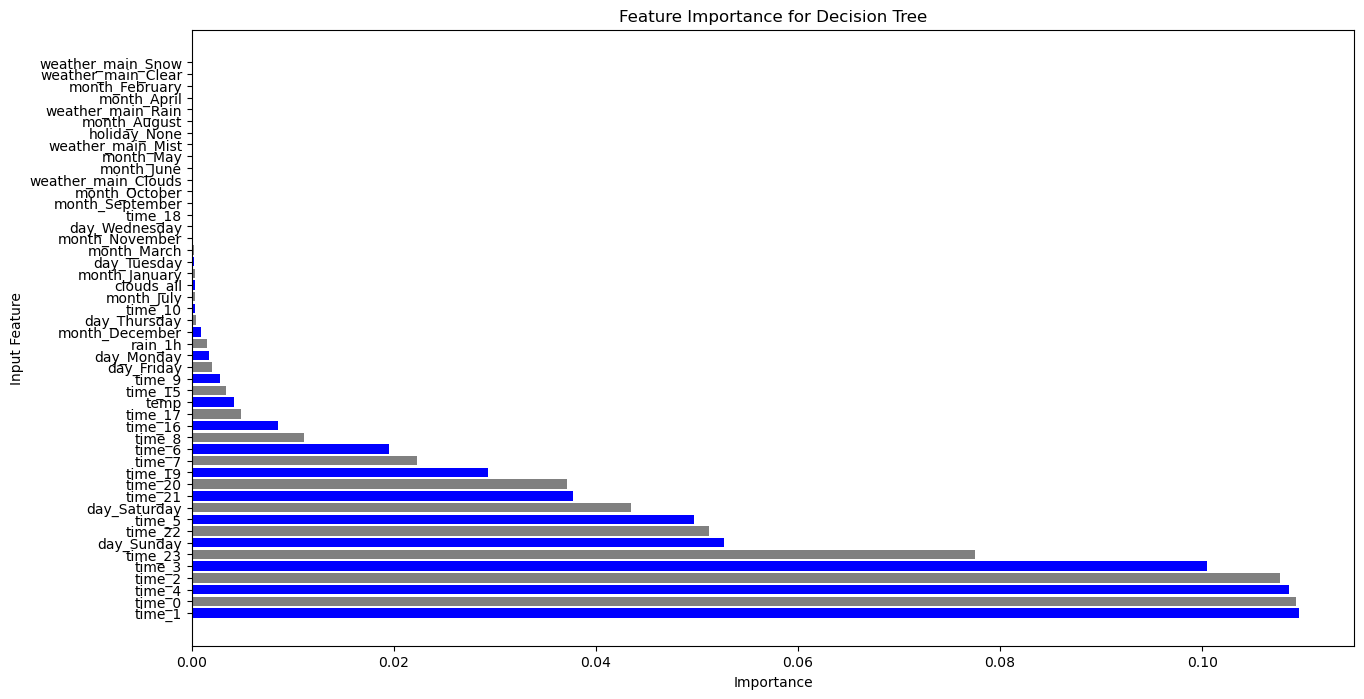

In [40]:
# Selecting features with non-zero importance values
feature_imp_nonzero_traffic_reg_dt = feature_imp_traffic_reg_dt[feature_imp_traffic_reg_dt['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(15, 8), dpi = 100)
plt.barh(feature_imp_nonzero_traffic_reg_dt['Feature'], feature_imp_nonzero_traffic_reg_dt['Importance'], color = ['blue', 'grey'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance for Decision Tree");

In [36]:
df_traffic_volume

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,month,day,time
0,None,288.28,0.0,0.0,40,Clouds,5545,October,Tuesday,9
1,None,289.36,0.0,0.0,75,Clouds,4516,October,Tuesday,10
2,None,289.58,0.0,0.0,90,Clouds,4767,October,Tuesday,11
3,None,290.13,0.0,0.0,90,Clouds,5026,October,Tuesday,12
4,None,291.14,0.0,0.0,75,Clouds,4918,October,Tuesday,13
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,3543,September,Sunday,19
48200,None,282.76,0.0,0.0,90,Clouds,2781,September,Sunday,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,2159,September,Sunday,21
48202,None,282.09,0.0,0.0,90,Clouds,1450,September,Sunday,22
